In [1]:
import pandas as pd
from upsetplot import plot as uplot
import upsetplot

In [2]:
tested = pd.read_excel('tested.xlsx', header=None)
tested.columns= ["Dataset", "Tools", "Papers"]
tested["Arrays"] = tested.apply(lambda x: x["Tools"].split(','), axis=1)
tested["PaperArrays"] = tested.apply(lambda x: x["Papers"].split(','), axis=1)
tested.drop(columns=["Tools", "Papers"], inplace = True)

In [5]:
output = tested["Arrays"].apply(pd.Series) \
    .merge(tested, right_index = True, left_index = True) \
    .drop(["Arrays", "PaperArrays"], axis = 1) \
    .melt(id_vars = ['Dataset'], value_name = "Tool") \
    .drop("variable", axis = 1).dropna().reset_index(drop=True)

output_papers = tested["PaperArrays"].apply(pd.Series) \
    .merge(tested, right_index = True, left_index = True) \
    .drop(["Arrays", "PaperArrays"], axis = 1) \
    .melt(id_vars = ['Dataset'], value_name = "Papers") \
    .drop("variable", axis = 1).dropna().reset_index(drop=True)
# output["id"] = output.index

tested_tool = pd.DataFrame(output.groupby("Tool")['Dataset'].apply(list)).reset_index()
tested_papers = pd.DataFrame(output_papers.groupby("Papers")['Dataset'].apply(list)).reset_index()


all_tools = list(output["Tool"].unique())
all_datasets = list(output["Dataset"].unique())
all_papers = list(output_papers["Papers"].unique())

In [64]:
splitted_datasets = pd.DataFrame(all_datasets, columns=["Dataset"])
splitted_tools = pd.DataFrame(all_tools, columns=["Tools"])
splitted_tools_papers = pd.DataFrame(all_papers, columns=["Papers"])

In [65]:
# Add the tools to datasets:
for tool in all_tools:
    splitted_datasets[tool] = tested.Arrays.apply(lambda x: tool in x)
    
# Add the tools to datasets:
for dataset in all_datasets:
    splitted_tools[dataset] = tested_tool.Dataset.apply(lambda x: dataset in x)
    


Which tools have been tested together on a tool


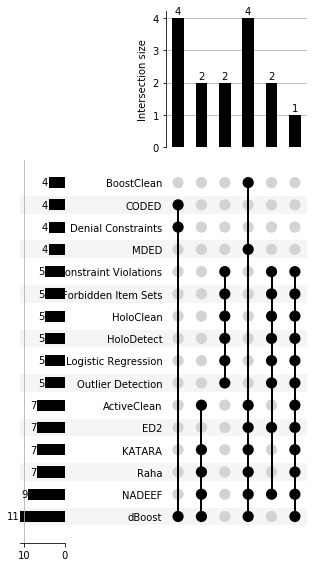

In [69]:
print("Which tools have been tested together on a tool")
toolcols = splitted_datasets.columns.difference(['Dataset']).tolist()
covercount = splitted_datasets.groupby(toolcols).count()
display(upsetplot.UpSet(covercount, sum_over="Dataset", orientation='horizontal', sort_by='degree', show_counts=True))

Which datasets have been used together to benchmark a tool


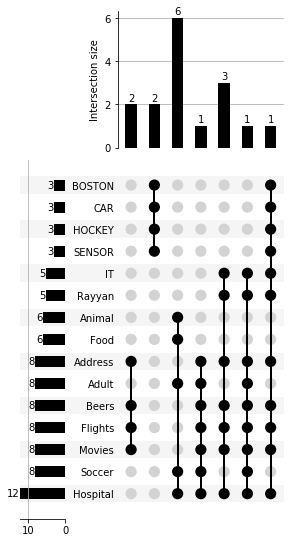

In [70]:
print("Which datasets have been used together to benchmark a tool")
datacols = splitted_tools.columns.difference(['Tools']).tolist()
covercount = splitted_tools.groupby(datacols).count()
upsetplot.UpSet(covercount, sum_over="Tools", orientation='horizontal', sort_by='degree', show_counts=True)

In [44]:
cols = ["Tool", "Dataset", "Paper"]
scores = pd.read_excel('tested.xlsx', sheet_name=1)
scores

,Tool,Dataset,Precision,Recall,F1-score,Training size,Paper,Berekende F1,Berekende F2
0,HoloDetect,Hospital,0.903,0.989,0.944,0.1,HoloDetect,0.944045,-0.000045
1,Constraint Violations,Hospital,0.030,0.372,0.055,0.1,HoloDetect,0.055522,-0.000522
2,HoloClean,Hospital,0.947,0.353,0.514,0.1,HoloDetect,0.514294,-0.000294
3,Outlier Detection,Hospital,0.640,0.667,0.653,0.1,HoloDetect,0.653221,-0.000221
4,Forbidden Item Sets,Hospital,0.008,0.653,0.003,0.1,HoloDetect,0.015806,-0.012806
...,...,...,...,...,...,...,...,...,...
179,BoostClean,Address,0.670,0.400,0.500,NaN,ED2 (technical report),0.500935,-0.000935
180,MDED,Address,1.000,0.820,0.900,NaN,ED2 (technical report),0.901099,-0.001099
181,dBoost,Address,0.430,0.490,0.450,NaN,ED2 (technical report),0.458043,-0.008043
182,KATARA,Address,0.180,0.530,0.260,NaN,ED2 (technical report),0.268732,-0.008732


In [47]:
import seaborn as sns

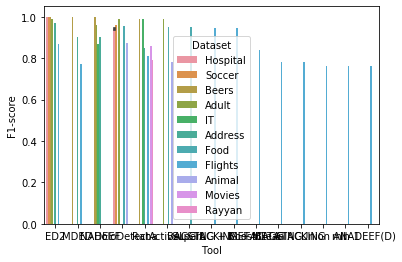

In [55]:
sns.barplot(data=scores.nlargest(40, "F1-score"), x="Tool", y="F1-score", hue="Dataset")